In [1]:
from aixi_booster import *
import numpy as np
import pandas as pd

In [2]:
#X = np.array(np.arange(1000),ndmin=2).T
#Y = np.array(np.sin(X/12.),ndmin=2)

In [3]:
#делаем датасет
#Суть датасета: есть зашумлённая синусоида, на которую наложены случайные блуждания. 
#AIXI примерно знает текущее состояние блужданий и немного устаревшие значения этой "синусоиды"
j = 0
X_lst = []
Y_lst = []
X_rec = [0, 0]
k = 0
dk = -0.015
for i in range(1000):
    j += (np.random.rand()-0.5)*6
    dk += (np.random.rand()-0.48)*0.001
    k += dk
    Y_rec = [np.sin(X_rec[0]*0.07 + X_rec[1]*0.07) + k]
    Y_prev = 0
    if len(Y_lst)>5:
        Y_prev = Y_lst[-5][0]
    X_rec = [i, j, dk, Y_prev]
    X_lst.append(X_rec)
    Y_lst.append(Y_rec)
X = np.array(X_lst)
Y = np.array(Y_lst)

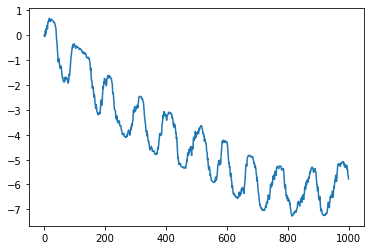

In [4]:
plt.plot(Y)

In [5]:
border = 500
X_train = X[:border,:]
X_test = X[border:,:]
Y_train = Y[:border,:]
Y_test = Y[border:,:]

In [6]:
%%time
#forest_count - число гипотез, то есть размер леса гипотез
#episodes - эпизоды работы AIXI. Если в реальной жизни данные - это несколько блоков по несколько записей.
#Причём каждый блок - это последовательность, у которой известно прошлое, но неизвестно будущее и неизвестны другие последовательности.
#Вот эпизоды - это такие последовательности. Например, если у нас данные - это 2 поездки на машине в 10 минут и в 50 минут, то первым эпизодом будут данные из одной поездки, а вторым - из второй.
#sample_part - сколько последовательностей использовать для генерации каждой одной гипотезы
#popsize, maxiter, alpha_count, elitarism, mutation_p - параметры эволюции (мы не будет тупо перебирать гипотезы)
#popsize - размер популяции, maxiter - число поколений, alpha_count - число альфачей (кто размножается), elitarism - число элитариев (кто сохраняется в неизменном виде в следующем поколении) 
#mutation_p - вероятность мутации
#boosting_count - каждая гипотеза сделана по схеме "бустинг". То есть вначале подбираем гипотезу, 
#которая максимально хорошо предсказывает Y, затем гипотезу, которая максимально хорошо исправляет ошибки первой гипотезы и так далее
#boosting_count - это число слоёв в этом "бутерброде"
model = symbolic_regression_multyboosting(size_genom=900,tact_count=30, regularization=0.06)
episodes=[[0,int(len(Y_train)/4)],[int(len(Y_train)/4),int(2*len(Y_train)/4)],[int(2*len(Y_train)/4),int(3*len(Y_train)/4)],[int(3*len(Y_train)/4),int(4*len(Y_train)/4)]]
model.fit(X_train,Y_train,forest_count=9,sample_part=0.8,episodes=episodes,popsize=30, maxiter=3, boosting_count=2, alpha_count=5, elitarism=2, mutation_p=0.02)

FOREST NUMBER 0, episodes [[  0 125]
 [375 500]
 [125 250]
 [  0 125]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.006551482775333666 0.00416828931832653 0.008870877896709976
[0.66666667 0.002      0.00308642 0.00678733 0.00664011 0.00578704
 0.0042508  0.00426439 0.002      0.00243013 0.00569106 0.00265604
 0.00455927 0.00852273 0.00486381 0.00832178 0.00539568 0.00819672
 0.0065703  0.002      0.00593472 0.00557621 0.002      0.00283688
 0.00667557 0.00410256 0.00373134 0.00617284 0.00619195 0.00719424
 0.00531444 0.00620476 0.00367197 0.00515021 0.00406174 0.00915332
 0.002      0.0080429  0.00615764 0.0023511  0.0071599  0.00217865
 0.00368324 0.002      0.00686813 0.00258398 0.00286533 0.00487013
 0.00504202 0.00412371 0.00813008 0.00511247 0.00321199 0.00414079
 0.00275735 0.00256739 0.00900901 0.00566038 0.00729129 0.00816327
 0.00990854 0.00595593 0.01263001 0.01089918 0.00833868 0.00762195
 0.00727513 0.00799543 0.00898693 0.01067616 0.01069519 0.00981675
 0.01350

selected linear model 0.05, mse 0.035631914826986695 [0.44974061860263503, 0.50986195355235, 0.05236544445201833, 0.8343995292931801, 0.052781157594541175, 0.035631914826986695]
BOOST 0 ready. Score 0.012396005577857463.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.015970752165545332 0.006495736335051598 0.0600000000005
[0.66666667 0.002      0.02008608 0.00639659 0.00660502 0.00577367
 0.01617796 0.00425532 0.002      0.00242424 0.00568182 0.00263852
 0.00455235 0.00846262 0.00485437 0.00824176 0.00539568 0.00818833
 0.0065703  0.002      0.00565771 0.00557621 0.002      0.00283688
 0.02122347 0.00408998 0.00366972 0.00617284 0.02298851 0.00719424
 0.00530973 0.00620476 0.00365854 0.02377179 0.01329163 0.00913242
 0.002      0.008      0.00595948 0.00233827 0.00707547 0.01443299
 0.00367647 0.002      0.0218509  0.00258065 0.00286533 0.00483871
 0.0048     0.00411946 0.00790514 0.00509684 0.00321199 0.01576355
 0.00275229 0.00255428 0.00890208 0.0257732  0.0257732  0.02

selected boosting without linear layer, mse 6.676900935163703 [1265813873.4808514, 6.676900935163703, 20870175278.8545, 7676695224.5931, 45219650015.334694, 55947838593.51974]
BOOST 1 failed. Score:1.1664125925422322
err_sum,complexity 0.13855965348704832 41
FOREST NUMBER 1, episodes [[  0 125]
 [125 250]
 [  0 125]
 [125 250]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.01592356687914013 0.007035746343664308 0.0600000000005
[0.66666667 0.002      0.02       0.00636943 0.00660502 0.00575374
 0.01609658 0.00528541 0.00225225 0.00240096 0.00646726 0.0037594
 0.00455235 0.00843882 0.00475285 0.00818554 0.005386   0.00880626
 0.00743494 0.00263505 0.0056338  0.00556586 0.002      0.00282885
 0.02227433 0.00408163 0.003663   0.00617284 0.02298851 0.00718563
 0.00529101 0.00617284 0.00364078 0.02373418 0.01329163 0.00909091
 0.002      0.00795756 0.00595948 0.00233645 0.00700935 0.01443299
 0.00365631 0.002      0.02179177 0.00255754 0.00847458 0.00481541
 0.00473186 0.00489237 

selected boosting without linear layer, mse 0.3132003374888603 [1.1347503042095348, 0.3132003374888603, 1.0429999020614178, 0.7921131038176888, 2.9689791122042535, 3.2610857655449546]
BOOST 0 ready. Score 0.11494003868230332.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.018140589569236584 0.007160759040494092 0.0600000000005
[0.66666667 0.002      0.02       0.00625    0.00658762 0.00574713
 0.01606426 0.00528541 0.00223714 0.00237812 0.00646726 0.00372208
 0.00454545 0.00843882 0.00475285 0.00809717 0.00538117 0.00877193
 0.00739827 0.00263505 0.00558659 0.00509338 0.002      0.00281294
 0.02222222 0.00407747 0.00364964 0.00616523 0.02292264 0.00717703
 0.00519931 0.00611621 0.00363196 0.02291826 0.01329163 0.00909091
 0.002      0.00793651 0.00595238 0.00226074 0.00700935 0.01443299
 0.00365631 0.002      0.02173913 0.00255754 0.0084507  0.00481541
 0.00472441 0.00485437 0.01132075 0.00509684 0.00406091 0.01571709
 0.00268097 0.00358852 0.00887574 0.02564103 0.02564103

selected boosting without linear layer, mse 1.9964893913713837 [2.0503763681865403, 1.9964893913713837, 2.7202948279038686, 2.039554340882397, 34.20955894897216, 77.7106908754917]
BOOST 1 failed. Score:1.0615695653871575
err_sum,complexity 0.2413531064095258 130
FOREST NUMBER 2, episodes [[  0 125]
 [375 500]
 [250 375]
 [125 250]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.019396551724191812 0.007168458781481482 0.05429864253438914
[0.66666667 0.002      0.02106742 0.00623701 0.00658762 0.00560538
 0.01604814 0.00510725 0.00223464 0.00236686 0.00646726 0.00493827
 0.00439239 0.00839161 0.0056872  0.0094086  0.00536193 0.00970874
 0.01085645 0.00255754 0.00558659 0.00504202 0.002      0.00280899
 0.02262443 0.00404449 0.00364964 0.00612745 0.02292264 0.00716846
 0.00519031 0.00678952 0.00363196 0.02290076 0.01327088 0.00909091
 0.002      0.00791557 0.0059453  0.00225904 0.00697674 0.01443299
 0.00365631 0.00209864 0.02173913 0.00378788 0.0104712  0.00480769
 0.00472441 0

selected boosting without linear layer, mse 0.3915854935321495 [0.7679347240961956, 0.3915854935321495, 6.162588793195702, 2.3181430133807925, 2.986516793965627, 2.9716117967746105]
BOOST 0 ready. Score 0.07896539862209341.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.021067415730477528 0.007358717051758381 0.04567503434505108
[0.66666667 0.002      0.02106742 0.00614754 0.00655308 0.00559284
 0.01703407 0.00509684 0.00222965 0.00236686 0.00645682 0.00493827
 0.00438596 0.00834492 0.00659134 0.00905563 0.00536193 0.00969932
 0.01084337 0.00255754 0.00557103 0.00504202 0.002      0.00280702
 0.02262443 0.00404449 0.00362319 0.00612745 0.02292264 0.00710059
 0.00516796 0.00676329 0.00481348 0.02359209 0.01327088 0.00909091
 0.002      0.00791557 0.00593824 0.00222387 0.00697674 0.01438849
 0.00364299 0.00209864 0.02173913 0.0037831  0.0104712  0.0048
 0.00470958 0.00474834 0.01269841 0.00608519 0.00641026 0.01535509
 0.00259067 0.00353357 0.00826446 0.02564103 0.02564103 0

selected linear model 1, mse 5.062920526585659 [5.066790647185955, 5.0757391717403975, 5.069599485860318, 5.074032804061225, 5.062920526585659, 5.063050294668269]
BOOST 1 ready. Score:0.19243671282417976
err_sum,complexity 0.07433135036107805 172
FOREST NUMBER 3, episodes [[125 250]
 [375 500]
 [125 250]
 [  0 125]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.02175030830719582 0.007710334685940889 0.044018237082385864
[0.66666667 0.002      0.0210084  0.00613497 0.00637755 0.00540541
 0.01696607 0.00507099 0.00222717 0.00236686 0.00644641 0.00493218
 0.00436681 0.00834492 0.00636364 0.00899743 0.00536193 0.00966184
 0.01083032 0.00255102 0.00554785 0.00671141 0.002      0.00280702
 0.02257336 0.00403633 0.00362319 0.00673401 0.02292264 0.0070922
 0.00514139 0.00676329 0.00481348 0.02355623 0.01318852 0.00909091
 0.002      0.00787402 0.0059312  0.00294985 0.00694444 0.01438849
 0.00364299 0.00209864 0.02171291 0.0037831  0.01044386 0.00479233
 0.00469484 0.00474383 0.0125 

selected boosting without linear layer, mse 0.4416771466702128 [0.48480136083170194, 0.4416771466702128, 1.772234389319108, 0.48813936680174597, 1.5505314279373306, 0.9652428384361526]
BOOST 0 ready. Score 0.05970419397848538.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.021775544388665552 0.007643437174286791 0.04282674883558227
[0.66666667 0.002      0.0209205  0.00612245 0.00632911 0.00515464
 0.01694915 0.00507099 0.00222717 0.00231481 0.00642055 0.00480769
 0.00433526 0.00833333 0.0063234  0.00896287 0.00536193 0.00966184
 0.01070155 0.00254777 0.00546448 0.00658979 0.002      0.00271739
 0.02143623 0.00403226 0.00347222 0.00669643 0.02288984 0.00707547
 0.00513259 0.00675024 0.00457143 0.02350265 0.01276276 0.00907029
 0.002      0.00787402 0.00592417 0.0029347  0.00683371 0.01438849
 0.00363306 0.00208117 0.02166065 0.00377834 0.01036269 0.00445765
 0.0046875  0.0047259  0.01212121 0.00604839 0.00639269 0.01476015
 0.00258621 0.00352113 0.00746269 0.02504174 0.025

iteration 0 y= [0.0447156  0.04692093 0.04929663 0.04978254 0.05090777 0.05187248
 0.05312239 0.05343057 0.05352165 0.05421942 0.05498808 0.05614296]
iteration 1 y= [0.0447156  0.04692093 0.04929663 0.04978254 0.05090777 0.05187248
 0.05312239 0.05343057 0.05352165 0.05412883 0.05421942 0.05498808]
iteration 2 y= [0.0447156  0.04692093 0.04929663 0.04978254 0.05090777 0.05187248
 0.05312239 0.05343057 0.05352165 0.05412883 0.05421942 0.05498808]
iteration final y= [0.0447156  0.04692093 0.04929663 0.04978254 0.05090777 0.05187248
 0.05312239 0.05343057 0.05352165 0.05412883 0.05421942 0.05498808]
NOCOMPILED [113. 140. 119. 166. 122. 140. 165. 113. 135. 113. 113. 133. 140. 135.
 168. 113. 154. 166. 122. 140. 155. 154. 128. 159. 154. 154. 131. 140.
 135. 168. 140. 140. 140. 189. 144. 154. 155. 119. 144. 140. 143. 154.
 166. 140. 154. 140. 113. 122. 165. 144. 122. 135. 122. 155. 135.]
COMPILED [21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 21.0, 30.0, 5.0, 39.0, 5.0, 39.0, 6.0, 12.0, 17

selected boosting without linear layer, mse 1.8789623334277037 [2457.4283702514545, 1.8789623334277037, 713.1942403053523, 11.711323050428778, 33404.25179104123, 359701.2218167515]
BOOST 1 failed. Score:1.0351584623364072
err_sum,complexity 0.4274459055720582 55
FOREST NUMBER 5, episodes [[  0 125]
 [250 375]
 [250 375]
 [125 250]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.02205887123473018 0.008320369652999308 0.0385199240989611
[0.66666667 0.002      0.02091503 0.00567108 0.00630517 0.00515464
 0.01693227 0.00468604 0.00221484 0.00219058 0.00612089 0.00478469
 0.00424328 0.00831025 0.00631199 0.00839329 0.00526778 0.00960615
 0.01065089 0.00229885 0.00543478 0.00617284 0.002      0.00271555
 0.02129925 0.00486855 0.00482315 0.00702106 0.02272727 0.00662983
 0.00511073 0.00649954 0.00563698 0.02334337 0.01272455 0.00898876
 0.002      0.0078125  0.00588928 0.00290909 0.00835073 0.01387512
 0.00351494 0.002      0.02160864 0.00373134 0.00888889 0.0041841
 0.00453858 0.00

iteration 0 y= [0.23293605 0.28427337 0.33759079 0.34164309 0.34591574 0.34852647
 0.35485376 0.35506004 0.3647432  0.38659186 0.38806272 0.40010349]
iteration 1 y= [0.2246104  0.23293605 0.28427337 0.28912126 0.28928852 0.28928852
 0.28928852 0.28928852 0.28928852 0.28928852 0.28928852 0.28928852]
iteration 2 y= [0.20130957 0.2246104  0.23293605 0.2431872  0.25143422 0.25411982
 0.26241484 0.26318528 0.26462723 0.28427337 0.28912126 0.28928852]
iteration final y= [0.20130957 0.2246104  0.23293605 0.2431872  0.25143422 0.25411982
 0.26241484 0.26318528 0.26462723 0.28427337 0.28912126 0.28928852]
NOCOMPILED [  0.           0.         100.26690564   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.      

selected linear model 50, mse 2.8351817564691495 [10.18067806853598, 2.907290167309241, 2.8351817564691495, 6.17947811205101, 20.481917725744594, 78.72963237893251]
BOOST 1 ready. Score:0.27672386933254634
err_sum,complexity 0.056845272447144206 104
FOREST NUMBER 6, episodes [[375 500]
 [375 500]
 [375 500]
 [  0 125]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.02247191011264045 0.008177570093574766 0.03580246913592593
[0.66666667 0.002      0.02025316 0.00524476 0.00628141 0.00514933
 0.01674877 0.00468604 0.00221239 0.00218341 0.00602864 0.0047619
 0.00422535 0.00823045 0.00714924 0.00817757 0.00507185 0.0094162
 0.01065089 0.00228833 0.00541272 0.00762195 0.002      0.00271186
 0.02129925 0.00486381 0.0048     0.00699301 0.02266289 0.00661521
 0.00509338 0.00649954 0.00550661 0.02327327 0.01271503 0.00896861
 0.002      0.00735294 0.00584795 0.00290065 0.00775194 0.01376598
 0.00350263 0.002      0.02155689 0.00362757 0.00873362 0.00407609
 0.00452489 0.00444444 0.0120

selected boosting with linear layer, mse 0.12313372525024349 [0.12313372525024349, 0.26428355554116495, 0.7179211662642706, 0.5050117009617379, 1.4012884192442714, 1.4372309125403444]
BOOST 0 ready. Score 0.048283533481397405.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.02266074989530481 0.008047945205599314 0.035025987240256726
[0.66666667 0.002      0.02025316 0.00524476 0.00626566 0.00514933
 0.01669941 0.00468604 0.00220507 0.00218341 0.00601052 0.00475624
 0.00562588 0.00821918 0.00711111 0.00799087 0.00506329 0.0093985
 0.01041667 0.00228311 0.00541272 0.00762195 0.002      0.00271003
 0.02083333 0.00486381 0.0048     0.00697906 0.02266289 0.00661521
 0.00500835 0.00637523 0.00550661 0.02327327 0.01271503 0.00860215
 0.002      0.00735294 0.00584795 0.00290065 0.00775194 0.01376598
 0.00349956 0.002      0.0215311  0.00362319 0.0087146  0.00407056
 0.00452489 0.00444444 0.0119403  0.00588235 0.0061674  0.01469238
 0.00252525 0.00582072 0.00669643 0.0247117  0.0247

selected linear model 0.05, mse 3.753545572168114 [5.987067968379144, 6.133279714551675, 5.0318563648263845, 4.213040394406643, 6.991791984794682, 3.753545572168114]
BOOST 1 ready. Score:0.655930398921493
err_sum,complexity 0.14303211224374854 90
FOREST NUMBER 7, episodes [[375 500]
 [  0 125]
 [375 500]
 [375 500]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.022590361445933734 0.008049487844133037 0.03469709650439773
[0.66666667 0.002      0.02022756 0.0052356  0.00625    0.00514933
 0.01599247 0.00457038 0.00220264 0.00217865 0.00600601 0.00474496
 0.00562588 0.00810811 0.00688468 0.00799087 0.004971   0.00938967
 0.01035673 0.00223214 0.00540541 0.00762195 0.00337268 0.00267559
 0.02083333 0.00486381 0.00479233 0.00697211 0.02266289 0.00646552
 0.00500835 0.00637523 0.00550055 0.02259475 0.01266766 0.00860215
 0.002      0.00733496 0.00584112 0.00289436 0.00732601 0.01375246
 0.00349956 0.002      0.0215311  0.00361882 0.01012146 0.00405405
 0.00452489 0.0044405  0.0117

iteration 0 y= [0.33133379 0.35281767 0.37335597 0.37350043 0.3889319  0.3965097
 0.39968488 0.42561278 0.43701359 0.44285129 0.4494406  0.44957859]
iteration 1 y= [0.30470062 0.30920338 0.33133379 0.35281767 0.35561139 0.37335597
 0.37350043 0.38761295 0.38863347 0.3889319  0.3965097  0.39968488]
iteration 2 y= [0.29562923 0.30470062 0.30920338 0.31007025 0.31681814 0.33133379
 0.33137618 0.33837621 0.35281767 0.35561139 0.36717171 0.3707541 ]
iteration final y= [0.23692654 0.24028263 0.24295979 0.24295979 0.24295979 0.24295979
 0.24295979 0.24295979 0.24295979 0.24295979 0.24295979 0.24295979]
NOCOMPILED [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.       

selected boosting with linear layer, mse 1.168199778855492 [1.168199778855492, 1.325446569470566, 1.5768847274598763, 1.7477514742562088, 70.09602566745222, 51.67360595262372]
BOOST 1 ready. Score:0.36604787194099503
err_sum,complexity 0.12640535916373177 108
FOREST NUMBER 8, episodes [[  0 125]
 [125 250]
 [125 250]
 [  0 125]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.022761760242943855 0.008314436885941042 0.03339882121827112
[0.66666667 0.002      0.01992528 0.00502513 0.00609756 0.00513347
 0.01596244 0.00455373 0.00220022 0.00217391 0.00670141 0.00473373
 0.00560224 0.00806452 0.00683761 0.00876232 0.0049505  0.00996377
 0.01025057 0.00222469 0.00632111 0.00761035 0.00337268 0.00266312
 0.02083333 0.00485437 0.00603318 0.00795229 0.02259887 0.00716479
 0.00499584 0.00635786 0.00549451 0.02307138 0.01263941 0.00854701
 0.002      0.00733496 0.00582072 0.00281294 0.00732601 0.01443696
 0.00431034 0.00292113 0.02140309 0.00358423 0.01006036 0.00394218
 0.00449102 0.00

selected linear model 50, mse 0.1939328227290899 [0.4793149297595099, 0.31176411465307496, 0.1939328227290899, 0.3226702183715263, 1.6680730370761556, 2.30529971175582]
BOOST 0 ready. Score 0.05352595372957892.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.0227963525837386 0.008495161555008119 0.03339260727631034
[0.66666667 0.002      0.01992528 0.00501672 0.00607533 0.00512821
 0.01596244 0.00447227 0.00220022 0.0021575  0.00743494 0.00471143
 0.00559441 0.00805369 0.00683761 0.00876232 0.00494641 0.00996377
 0.01025057 0.00217391 0.00632111 0.00736377 0.003367   0.00265604
 0.02081165 0.00485437 0.00601504 0.00795229 0.022567   0.00714286
 0.00499584 0.00633484 0.00549451 0.02305476 0.01262064 0.00852878
 0.002      0.00728155 0.00582072 0.00350385 0.00732601 0.01443696
 0.00430293 0.00291262 0.02140309 0.00357569 0.01       0.00383142
 0.00447761 0.00443262 0.01169591 0.00776699 0.00614574 0.01521934
 0.00336134 0.00694444 0.00656455 0.02442997 0.02442997 0.02442997
 

selected boosting without linear layer, mse 2.141603640277233 [2.394214600763107, 2.141603640277233, 12.21987062919192, 8.399934580456723, 117.48837419968976, 146.5588660553019]
BOOST 1 ready. Score:0.879641713466388
err_sum,complexity 0.291045634830138 107
CPU times: user 2min 42s, sys: 31 s, total: 3min 13s
Wall time: 10min 35s


In [ ]:
#Архитектура ML-модели:
#symbolic_regression_multyboosting, он же FOREST - массив под-моделей symbolic_regression_boosting. Соединены как random forest, параллельно
#symbolic_regression_boosting - массив моделей symbolic_regression, соединённых как бустинг, последовательно
#symbolic_regression - машина Тьюринга и пост-обработчик в виде какой-нибудь модели ML. Модель выбирается автоматом из Ridge, Xgboost и стекинга Xgboost+Ridge

In [7]:
Y_pred = model.predict(X_test,return_hist=True)
#ПРОТОКОЛ ГИСТОГРАММЫ: [pred_list,p_array,m_pred]  
#pred list - это прогноз ы отдельных моделей
#p_array - это вероятности этих моделей быть истинными (очень условно, но это терминология AIXI. Вероятность зависит от mse и числа ненулевых генов)
#m_pred - матожидание результата. Взвешенная сумма всех прогнозов

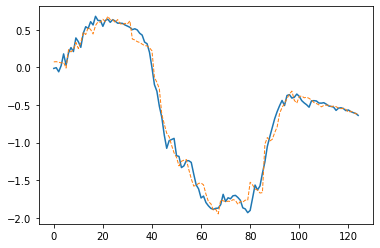

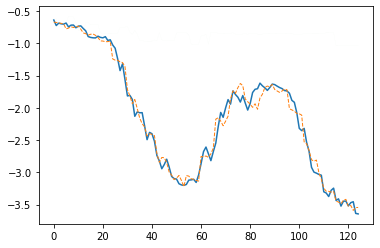

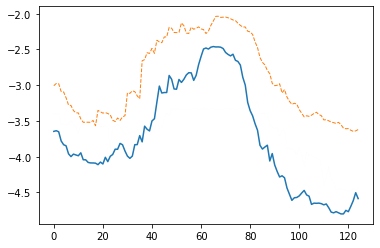

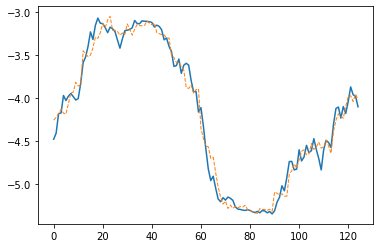

In [8]:
#train
#отрисовать факт синим
#Y_pred = model.predict(X_train,return_hist=True)
for episod in episodes:
    #мы учили систему выдавать последовательности длиной в 500/4, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    plt.plot(Y_train[episod[0]:episod[1],:])
    Y_pred = model.predict(X_train[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    for i in range(len(pred)):
        #отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
        if 10+np.log(p_array[i])>0:
            plt.plot(pred[i],'--',linewidth=0.1*np.max([10+np.log(p_array[i]),0] ) )
    plt.show()

mae 0.3584925919071839 mae_mean 0.07308754114802488


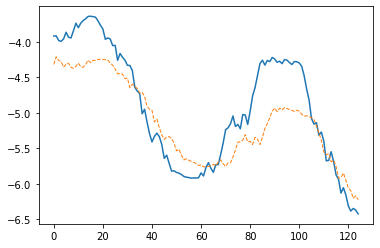

mae 0.422177563696932 mae_mean 0.06962395922955258


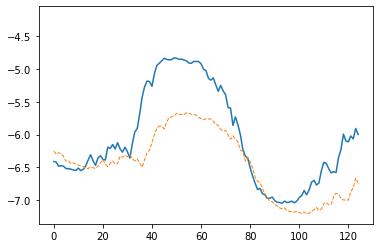

mae 0.8445225783961728 mae_mean 0.13599933224515798


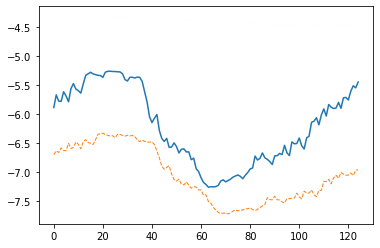

mae 1.4114344559491094 mae_mean 0.23440346541596022


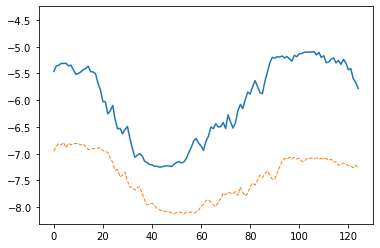

In [9]:
#test
#отрисовать факт
for episod in episodes:
    #мы учили систему выдавать последовательности длиной в 500/3, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    plt.plot(Y_test[episod[0]:episod[1],:])
    Y_pred = model.predict(X_test[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    for i in range(len(pred)):
        #отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
        if 10+np.log(p_array[i])>0:
            plt.plot(pred[i],'--',linewidth=0.1*np.max([10+np.log(p_array[i]),0] ) )
    mae = np.mean(np.abs(m_pred - Y_test[episod[0]:episod[1],:]))
    mae_mean = mae/np.mean(np.abs(Y_test[episod[0]:episod[1],:]))
    print('mae',mae,'mae_mean',mae_mean)
    plt.show()

In [10]:
#делаем датасет
#Суть датасета: есть рандомные массивы, надо найти максимум
X_lst = []
Y_lst = []
for i in range(1000):
    X_rec = np.random.rand(6)*20
    Y_rec = [np.max(X_rec)]
    X_lst.append(X_rec)
    Y_lst.append(Y_rec)
X = np.array(X_lst)
Y = np.array(Y_lst,ndmin=2)

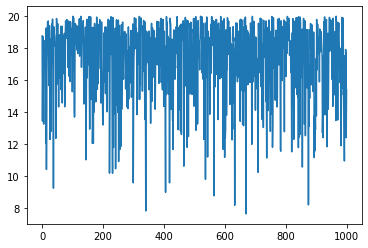

In [11]:
plt.plot(Y)

In [12]:
border = 500
X_train = X[:border,:]
X_test = X[border:,:]
Y_train = Y[:border,:]
Y_test = Y[border:,:]

In [13]:
%%time
model = symbolic_regression_multyboosting(size_genom=900,tact_count=50, regularization=0.06)
episodes=[]
for i in range(len(Y_train)-1):
    episodes.append([i,i+1])
model = symbolic_regression_multyboosting(size_genom=900,tact_count=30, regularization=0.06)
model.fit(X_train,Y_train,forest_count=9,sample_part=0.8,episodes=episodes,popsize=30, maxiter=3, boosting_count=2, alpha_count=5, elitarism=2, mutation_p=0.02)

FOREST NUMBER 0, episodes [[168 169]
 [ 15  16]
 [493 494]
 [ 72  73]
 [ 22  23]
 [299 300]
 [466 467]
 [ 75  76]
 [360 361]
 [263 264]
 [162 163]
 [433 434]
 [ 95  96]
 [ 75  76]
 [213 214]
 [ 47  48]
 [319 320]
 [287 288]
 [218 219]
 [404 405]
 [124 125]
 [116 117]
 [293 294]
 [167 168]
 [195 196]
 [102 103]
 [260 261]
 [426 427]
 [363 364]
 [ 51  52]
 [359 360]
 [ 38  39]
 [490 491]
 [ 33  34]
 [ 58  59]
 [380 381]
 [255 256]
 [323 324]
 [325 326]
 [ 88  89]
 [196 197]
 [302 303]
 [454 455]
 [351 352]
 [211 212]
 [121 122]
 [ 31  32]
 [450 451]
 [ 80  81]
 [ 52  53]
 [238 239]
 [460 461]
 [ 50  51]
 [132 133]
 [218 219]
 [319 320]
 [207 208]
 [ 49  50]
 [295 296]
 [430 431]
 [136 137]
 [434 435]
 [493 494]
 [271 272]
 [233 234]
 [493 494]
 [392 393]
 [247 248]
 [401 402]
 [406 407]
 [248 249]
 [373 374]
 [ 73  74]
 [185 186]
 [361 362]
 [366 367]
 [252 253]
 [474 475]
 [446 447]
 [ 83  84]
 [ 96  97]
 [ 43  44]
 [288 289]
 [ 26  27]
 [498 499]
 [392 393]
 [ 76  77]
 [254 255]
 [138 

selected boosting with linear layer, mse 0.00911222927408857 [0.00911222927408857, 0.009459508595592735, 0.011808699638522031, 0.012087304985566587, 0.011804208287472043, 0.011804138487867436]
BOOST 0 ready. Score 0.03899774218670862.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.022692889561422087 0.008456659619661733 0.03194444444458333
[0.66666667 0.002      0.01941748 0.00645161 0.00606796 0.00490677
 0.0159176  0.00446828 0.00219539 0.00212993 0.0074129  0.00470035
 0.0055788  0.00780234 0.00646204 0.00868621 0.004914   0.00996377
 0.01020408 0.0021692  0.00627353 0.00733138 0.00336134 0.00264901
 0.02063983 0.0048216  0.00596125 0.00792079 0.02253521 0.00680934
 0.00499584 0.00631769 0.00548246 0.02303816 0.01292175 0.00845666
 0.002      0.00728155 0.00574713 0.0034965  0.00728597 0.01439539
 0.00414594 0.00373832 0.02137767 0.00357569 0.00996016 0.00382653
 0.00447761 0.00443262 0.01432665 0.00747664 0.00603969 0.01513802
 0.0033557  0.00694444 0.00653595 0.024390

selected boosting without linear layer, mse 3.3362836589470692 [3.349679049963406, 3.3362836589470692, 3.58132121920904, 3.5544767039308764, 3.5941413470851815, 3.6593596551604373]
BOOST 1 ready. Score:0.9699386026914938
err_sum,complexity 0.007787995148126239 91
FOREST NUMBER 1, episodes [[  0   1]
 [ 41  42]
 [  0   1]
 [353 354]
 [356 357]
 [ 95  96]
 [471 472]
 [  9  10]
 [355 356]
 [464 465]
 [378 379]
 [188 189]
 [223 224]
 [474 475]
 [271 272]
 [163 164]
 [  8   9]
 [ 26  27]
 [333 334]
 [130 131]
 [ 24  25]
 [354 355]
 [417 418]
 [288 289]
 [ 53  54]
 [189 190]
 [483 484]
 [361 362]
 [ 37  38]
 [400 401]
 [133 134]
 [ 63  64]
 [400 401]
 [136 137]
 [208 209]
 [176 177]
 [354 355]
 [246 247]
 [180 181]
 [ 27  28]
 [ 88  89]
 [ 23  24]
 [422 423]
 [144 145]
 [ 50  51]
 [ 20  21]
 [426 427]
 [232 233]
 [156 157]
 [432 433]
 [254 255]
 [232 233]
 [465 466]
 [171 172]
 [228 229]
 [457 458]
 [374 375]
 [361 362]
 [ 85  86]
 [ 91  92]
 [182 183]
 [ 16  17]
 [219 220]
 [462 463]
 [343 

selected boosting with linear layer, mse 0.012284219050000659 [0.012284219050000659, 0.012691657390658998, 0.014109922180198324, 0.014293987790985568, 0.014489863715330866, 0.01595812347151922]
BOOST 0 ready. Score 0.04505303553145242.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.022692889561422087 0.009523809524047619 0.03176795580124309
[0.66666667 0.002      0.01939394 0.00623053 0.00605327 0.00471698
 0.01587302 0.00446429 0.00219539 0.00212993 0.00740192 0.00457666
 0.00543478 0.00759494 0.00723473 0.00967742 0.00490196 0.01083032
 0.01020408 0.00216216 0.00626566 0.00730994 0.00324149 0.00264201
 0.02051282 0.00455373 0.00594354 0.00791296 0.02250352 0.00678952
 0.00496689 0.00719424 0.00547645 0.02293907 0.01282965 0.00828157
 0.002      0.00952381 0.00568828 0.00412939 0.00718133 0.01552511
 0.00407166 0.00371058 0.02137767 0.00352526 0.00990099 0.00382653
 0.00447094 0.00613497 0.01432665 0.00835655 0.0060241  0.01512456
 0.00410846 0.00803674 0.0056926  0.02439

selected boosting with linear layer, mse 2.0136239427302454 [2.0136239427302454, 2.0865466438070865, 2.2700987415245875, 2.2534569760364715, 2.271315401513014, 2.2713394719374804]
BOOST 1 failed. Score:1.0297773488675828
err_sum,complexity 0.006463687675285597 47
FOREST NUMBER 2, episodes [[348 349]
 [463 464]
 [318 319]
 [441 442]
 [140 141]
 [407 408]
 [262 263]
 [245 246]
 [136 137]
 [107 108]
 [191 192]
 [198 199]
 [ 27  28]
 [358 359]
 [287 288]
 [162 163]
 [  1   2]
 [167 168]
 [270 271]
 [ 81  82]
 [325 326]
 [178 179]
 [ 23  24]
 [277 278]
 [206 207]
 [260 261]
 [355 356]
 [177 178]
 [370 371]
 [398 399]
 [236 237]
 [308 309]
 [305 306]
 [195 196]
 [457 458]
 [417 418]
 [468 469]
 [218 219]
 [406 407]
 [285 286]
 [253 254]
 [363 364]
 [492 493]
 [428 429]
 [460 461]
 [385 386]
 [ 37  38]
 [240 241]
 [122 123]
 [115 116]
 [372 373]
 [359 360]
 [  5   6]
 [ 37  38]
 [420 421]
 [323 324]
 [458 459]
 [344 345]
 [302 303]
 [320 321]
 [ 33  34]
 [340 341]
 [468 469]
 [309 310]
 [390 

selected boosting without linear layer, mse 0.01044910148277989 [0.01135253516370771, 0.01044910148277989, 0.011844448017390399, 0.012730368435162214, 0.012137351627658484, 0.014132608373114532]
BOOST 0 ready. Score 0.037625267370875494.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.022288261515750373 0.009463084889609645 0.030642341842588933
[0.66666667 0.002      0.0188457  0.00622084 0.0059952  0.0047081
 0.01587302 0.00442087 0.00216685 0.00212993 0.00739098 0.00457666
 0.00542741 0.00738916 0.00721732 0.00959488 0.00489796 0.0104712
 0.01014656 0.00215517 0.0062422  0.00724638 0.00323625 0.00263852
 0.02042901 0.00454133 0.00589971 0.00785083 0.0223152  0.00678952
 0.00495458 0.00716846 0.00535906 0.02293907 0.01282051 0.00826446
 0.002      0.00932401 0.00566251 0.00412655 0.00689655 0.01552511
 0.00407166 0.00371058 0.02135231 0.00351288 0.00990099 0.00382653
 0.00441176 0.00609225 0.01404494 0.00819672 0.00601892 0.01464255
 0.00408497 0.00803674 0.00566038 0.0222

iteration 0 y= [0.03199868 0.03226535 0.03539868 0.03599868 0.03639868 0.03639868
 0.03859868 0.03933201 0.03939868 0.04033201 0.04066535 0.04093201]
iteration 1 y= [0.03179868 0.03199868 0.03226535 0.03379868 0.03399868 0.03526535
 0.03539868 0.03599868 0.03606535 0.03633201 0.03639868 0.03639868]
iteration 2 y= [0.03179868 0.03199868 0.03226535 0.03326535 0.03379868 0.03399868
 0.03446535 0.03466535 0.03526535 0.03539868 0.03553201 0.03599868]
iteration final y= [0.03146535 0.03179868 0.03199868 0.03226535 0.03326535 0.03326535
 0.03379868 0.03399868 0.03446535 0.03466535 0.03526535 0.03539868]
NOCOMPILED [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.         155.0430717    0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.         130.
   0.           0.           0.      

selected boosting with linear layer, mse 0.011404586409912322 [0.011404586409912322, 0.013332639411098591, 0.013637985804829342, 0.012163820865831178, 0.013788100963275039, 0.013791124333790657]
BOOST 0 ready. Score 0.033998678442278746.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.022288261515750373 0.009382377617017745 0.029768599178488807
[0.66666667 0.002      0.01830664 0.00618238 0.0059952  0.00469925
 0.01584343 0.00440917 0.00216685 0.00212766 0.00739098 0.00453001
 0.00542005 0.00738007 0.00720576 0.00939457 0.00487805 0.01044386
 0.00980392 0.00213675 0.00622665 0.00721501 0.00322581 0.00260417
 0.02040816 0.00542986 0.00589971 0.00782779 0.0223152  0.00674374
 0.0049505  0.00714286 0.00532481 0.02285714 0.0125523  0.00819672
 0.002      0.00930233 0.00565611 0.00410116 0.00689655 0.0154827
 0.00406504 0.0037037  0.02110199 0.00350877 0.00970874 0.00382166
 0.00436681 0.00606586 0.0140056  0.00800712 0.00600858 0.0143824
 0.00408497 0.00798176 0.00566038 0.0222

selected boosting with linear layer, mse 2.1892754271164216 [2.1892754271164216, 2.1905534766272003, 2.6597478587004284, 2.5759751235774213, 2.6658785988804308, 2.6659998961006828]
BOOST 1 failed. Score:1.03941601630972
err_sum,complexity 0.007917349656488899 34
FOREST NUMBER 4, episodes [[388 389]
 [184 185]
 [243 244]
 [380 381]
 [444 445]
 [127 128]
 [362 363]
 [333 334]
 [255 256]
 [443 444]
 [239 240]
 [385 386]
 [165 166]
 [116 117]
 [125 126]
 [402 403]
 [ 80  81]
 [185 186]
 [ 62  63]
 [ 54  55]
 [414 415]
 [456 457]
 [397 398]
 [429 430]
 [415 416]
 [397 398]
 [ 94  95]
 [118 119]
 [155 156]
 [ 37  38]
 [165 166]
 [215 216]
 [193 194]
 [  4   5]
 [313 314]
 [331 332]
 [271 272]
 [136 137]
 [ 96  97]
 [237 238]
 [ 80  81]
 [354 355]
 [111 112]
 [108 109]
 [153 154]
 [306 307]
 [332 333]
 [298 299]
 [ 79  80]
 [203 204]
 [413 414]
 [114 115]
 [266 267]
 [254 255]
 [210 211]
 [139 140]
 [158 159]
 [299 300]
 [375 376]
 [ 38  39]
 [381 382]
 [201 202]
 [353 354]
 [242 243]
 [117 1

selected boosting with linear layer, mse 0.00991926771449226 [0.00991926771449226, 0.011837011903462194, 0.010827235060237849, 0.010543432973174014, 0.0108679706166244, 0.010868800868955177]
BOOST 0 ready. Score 0.034010277564207214.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.022156573116838996 0.009803921568736383 0.029545454545681818
[0.66666667 0.002      0.01830664 0.00616333 0.00598086 0.00467727
 0.01581395 0.00440141 0.0021645  0.00211416 0.0073692  0.00451467
 0.00541272 0.00734394 0.00720576 0.00938478 0.00486224 0.01042572
 0.00980392 0.00208333 0.00620347 0.00688705 0.00320513 0.00260247
 0.02026342 0.00541028 0.00554785 0.00767018 0.02225313 0.0065666
 0.00494641 0.00712378 0.00530223 0.02284083 0.0125261  0.00808081
 0.002      0.01103753 0.00565611 0.00408163 0.00686106 0.0154827
 0.00405515 0.00370028 0.02214452 0.00350877 0.00932836 0.00507614
 0.00434783 0.00604491 0.01388889 0.008      0.00684932 0.01430976
 0.0040783  0.00776053 0.00559701 0.02212389

selected boosting with linear layer, mse 2.102696383979111 [2.102696383979111, 2.111104758166744, 2.7060819958901146, 2.6851336847865235, 2.707669239968287, 2.707700730268206]
BOOST 1 failed. Score:1.0333586968233195
err_sum,complexity 0.008504374543402183 32
FOREST NUMBER 5, episodes [[116 117]
 [454 455]
 [126 127]
 [485 486]
 [265 266]
 [205 206]
 [170 171]
 [185 186]
 [ 52  53]
 [454 455]
 [247 248]
 [ 63  64]
 [392 393]
 [  1   2]
 [276 277]
 [269 270]
 [ 20  21]
 [336 337]
 [363 364]
 [ 38  39]
 [107 108]
 [246 247]
 [284 285]
 [ 27  28]
 [227 228]
 [335 336]
 [  2   3]
 [ 15  16]
 [383 384]
 [245 246]
 [255 256]
 [327 328]
 [119 120]
 [150 151]
 [297 298]
 [  9  10]
 [266 267]
 [231 232]
 [ 37  38]
 [151 152]
 [ 26  27]
 [489 490]
 [382 383]
 [118 119]
 [229 230]
 [126 127]
 [182 183]
 [350 351]
 [105 106]
 [379 380]
 [  3   4]
 [ 97  98]
 [236 237]
 [ 42  43]
 [272 273]
 [389 390]
 [434 435]
 [487 488]
 [ 96  97]
 [137 138]
 [195 196]
 [343 344]
 [441 442]
 [470 471]
 [241 242]

iteration 1 y= [0.34106537 0.35006537 0.3541987  0.35513203 0.3551987  0.35693203
 0.35966537 0.36053203 0.3609987  0.36113203 0.36133203 0.36226537]


Process ForkPoolWorker-915:
Process ForkPoolWorker-913:
Process ForkPoolWorker-916:
Process ForkPoolWorker-914:
Process ForkPoolWorker-920:
Process ForkPoolWorker-918:
Process ForkPoolWorker-919:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-917:
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
 

  File "/home/sd/Python/aixi_booster/aixi_booster.py", line 62, in compilation
    idx=np.where(np.array(code)>self.standard_commands_count)[0][0]
  File "<__array_function__ internals>", line 6, in round_
  File "/home/sd/Python/aixi_booster/aixi_booster.py", line 918, in __init__
    code=pl.compilation(code)
  File "/home/sd/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 3599, in round_
    return around(a, decimals=decimals, out=out)
  File "<__array_function__ internals>", line 6, in around
  File "/home/sd/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 3224, in around
    return _wrapfunc(a, 'round', decimals=decimals, out=out)
  File "/home/sd/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 58, in _wrapfunc
    return _wrapit(obj, method, *args, **kwds)
  File "/home/sd/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 47, in _wrapit
    result = getattr(asarray(obj), method)(*args, **kwd

KeyboardInterrupt: 

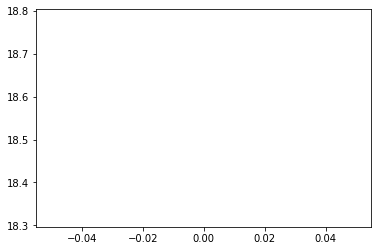

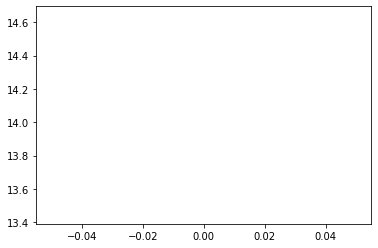

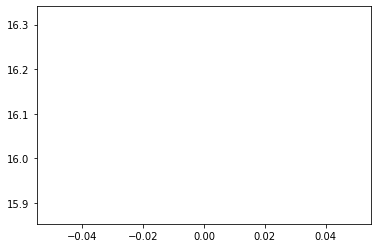

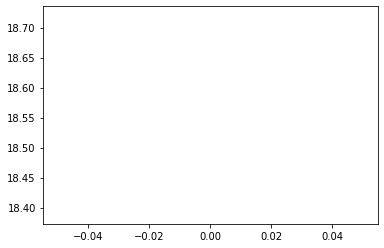

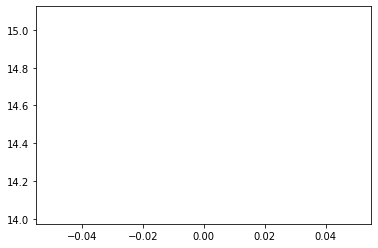

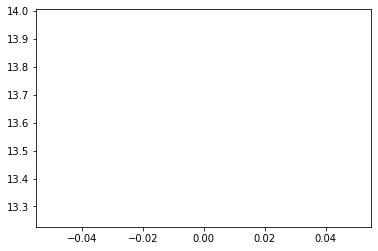

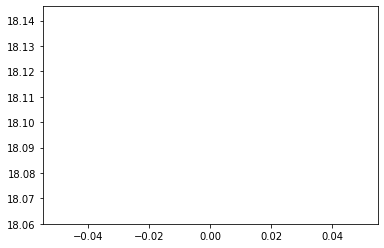

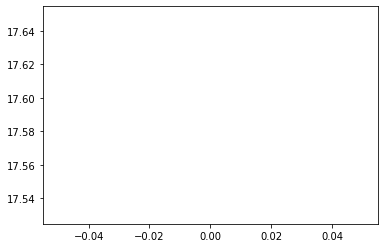

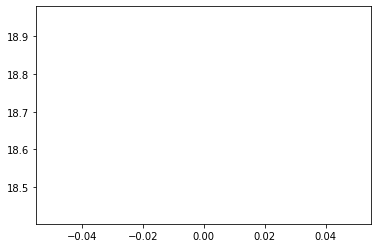

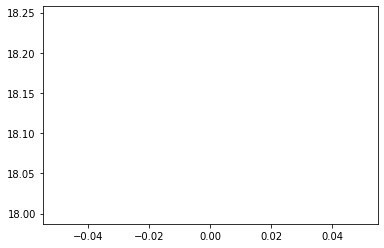

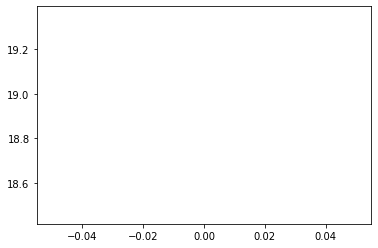

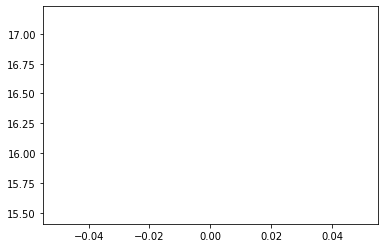

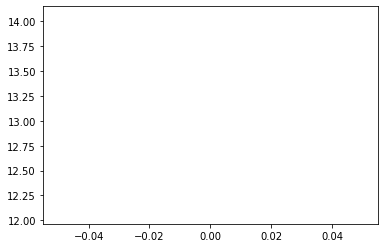

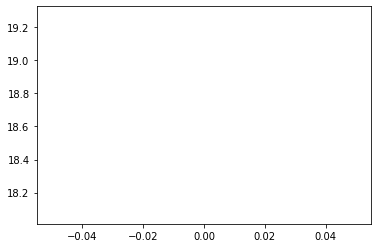

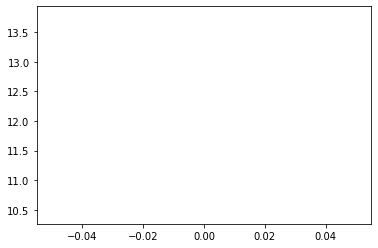

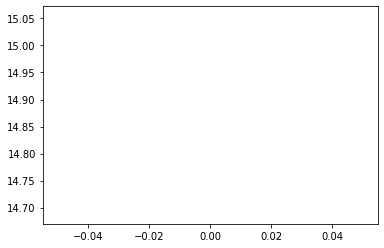

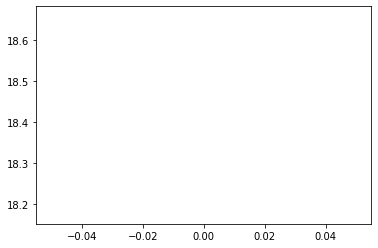

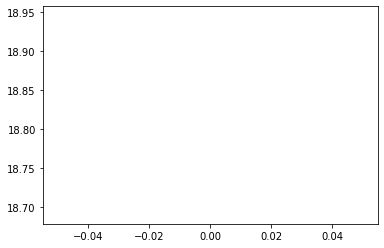

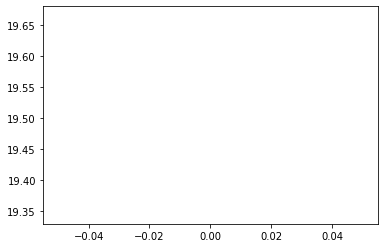

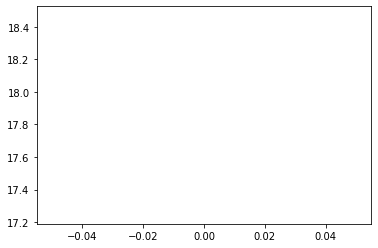

In [14]:
#train
#отрисовать факт синим
for episod in episodes[:20]:
    #мы учили систему выдавать последовательности длиной в 1, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    plt.plot(Y_train[episod[0]:episod[1],:])
    Y_pred = model.predict(X_train[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    for i in range(len(pred)):
        #отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
        if 10+np.log(p_array[i])>0:
            plt.plot(pred[i],'--',linewidth=0.1*np.max([10+np.log(p_array[i]),0] ) )
    plt.show()

mae 0.25680612492450905 mae_mean 0.01745497063260001


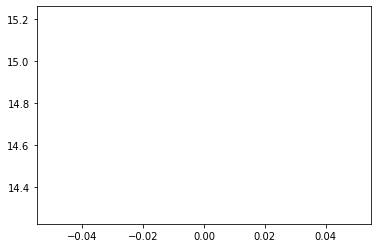

mae 1.5238317246459978 mae_mean 0.07720960829205017


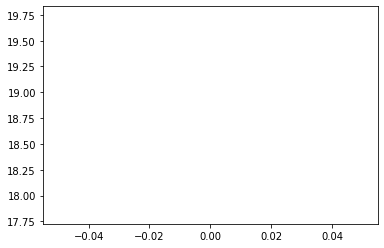

mae 0.06442535419565942 mae_mean 0.0036677967106483857


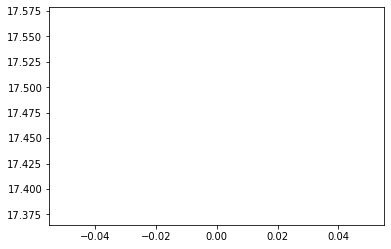

mae 0.39856032816841136 mae_mean 0.024107856280341847


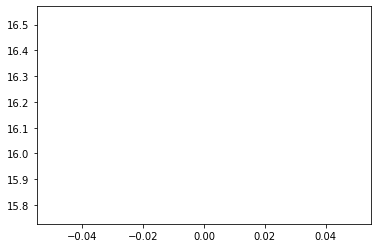

mae 0.05506217675259251 mae_mean 0.002756129318203458


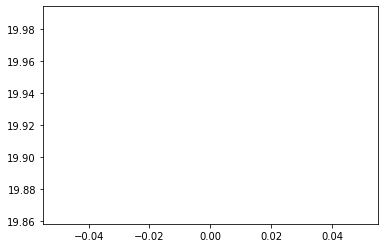

mae 1.069339510311071 mae_mean 0.08305917466331138


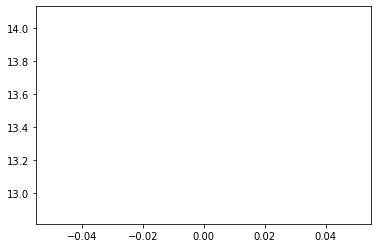

mae 1.125512061624761 mae_mean 0.08617703359057123


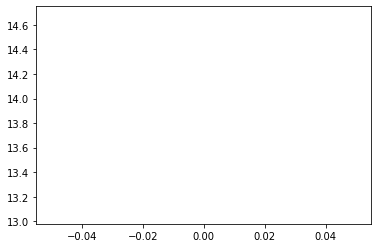

mae 0.15202462595597765 mae_mean 0.008075650296309286


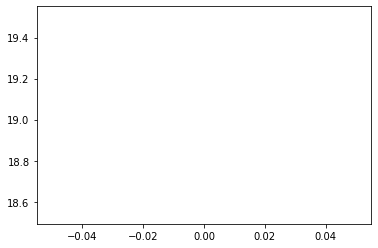

mae 0.044756887187062944 mae_mean 0.002384287199784259


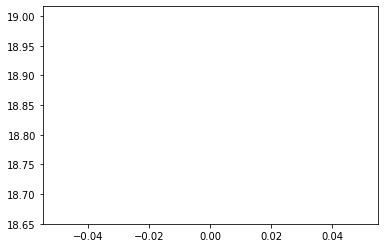

In [15]:
#test
#отрисовать факт
counter = 0
lst = []
for episod in episodes:
    counter += 1
    #мы учили систему выдавать последовательности длиной в 1, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    draw = counter<10
    if draw:
        plt.plot(Y_test[episod[0]:episod[1],:])
    Y_pred = model.predict(X_test[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    if draw:
        for i in range(len(pred)):
            #отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
            if 10+np.log(p_array[i])>0:
                plt.plot(pred[i],'--',linewidth=0.1*np.max([10+np.log(p_array[i]),0] ) )
    mae = np.mean(np.abs(m_pred - Y_test[episod[0]:episod[1],:]))
    mae_mean = mae/np.mean(np.abs(Y_test[episod[0]:episod[1],:]))
    lst.append({'mae':mae, 'mae_mean':mae_mean})
    if draw:
        print('mae',mae,'mae_mean',mae_mean)
        plt.show()

In [16]:
report = pd.DataFrame(lst)
report

,mae,mae_mean
0,0.256806,0.017455
1,1.523832,0.077210
2,0.064425,0.003668
3,0.398560,0.024108
4,0.055062,0.002756
...,...,...
494,0.207836,0.011851
495,0.243900,0.018035
496,0.407758,0.022755
497,0.840253,0.047550


In [17]:
print(report.mae.mean(),report.mae_mean.mean())

0.6062853757018243 0.0401630840716079
